<h1><center>PUC Minas - PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS</center></h1>

<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
TÍTULO:<br>
<br>
ALUNO: Wender Pereira Corrêa</h3>
Matrícula:
<p>Este notebook é referente ao Trabalho de Conclusão de Curso em Ciência de Dados e Big Data.</p>

#Leitura dos dados e importação das bibliotecas utilizadas

In [10]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import time

In [32]:
#definição de configuração de dataframes
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1200)
pd.set_option('display.precision',4)
pd.set_option('display.expand_frame_repr',False)


In [12]:
#Configurando os plots para serem exibidos dirertamente no notebook
%matplotlib inline

In [13]:
# Definindo a pasta de trabalho
dirCandidatoAnalise = "./candidatoAnalise"
dirCandidatoCassacaoAnalise = "./candidatoCassacaoAnalise" 
os.makedirs(dirCandidatoAnalise, exist_ok=True)
os.makedirs(dirCandidatoCassacaoAnalise, exist_ok=True)

In [14]:
def descompactar(nome_arquivo_compactado, diretorio):
    #Lê o arquivo compactado e extrai o conteúdo
    print(nome_arquivo_compactado)
    filebytes = BytesIO(
        requests.get(nome_arquivo_compactado).content
    )
    myzip = zipfile.ZipFile(filebytes)
    myzip.extractall(diretorio)
    return "Concluído"

<b>1) Dados Politicos</b>

In [15]:
ca = 2014
while ca < 2022:
    urlCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_" + str(ca)+ ".zip"
    descompactar(urlCandidatoAnalise,"./candidatoAnalise")
    urlCandidatoCassacaoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_" + str(ca)+ ".zip"
    descompactar(urlCandidatoCassacaoAnalise,"./candidatoCassacaoAnalise")
    ca+=2


https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2014.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_2014.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2016.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_2016.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2018.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_2018.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_2020.zip


In [16]:
print('Arquivos com extensão csv:')
concatenar = []
with os.scandir(dirCandidatoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)

  
    path = dirCandidatoAnalise
  
    # csv files in the path
    files = glob.glob(path + "/*.csv")

    # defining an empty list to store 
    # content
    data_frame = pd.DataFrame()
    content = []

    # checking all the csv files in the 
    # specified path
    for filename in files:
        df = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False)
        content.append(df)
    # converting content to data frame
    data_frame = pd.concat(content).drop_duplicates()


Arquivos com extensão csv:
consulta_cand_2014_AC.csv
consulta_cand_2014_AL.csv
consulta_cand_2014_AM.csv
consulta_cand_2014_AP.csv
consulta_cand_2014_BA.csv
consulta_cand_2014_BR.csv
consulta_cand_2014_BRASIL.csv
consulta_cand_2014_CE.csv
consulta_cand_2014_DF.csv
consulta_cand_2014_ES.csv
consulta_cand_2014_GO.csv
consulta_cand_2014_MA.csv
consulta_cand_2014_MG.csv
consulta_cand_2014_MS.csv
consulta_cand_2014_MT.csv
consulta_cand_2014_PA.csv
consulta_cand_2014_PB.csv
consulta_cand_2014_PE.csv
consulta_cand_2014_PI.csv
consulta_cand_2014_PR.csv
consulta_cand_2014_RJ.csv
consulta_cand_2014_RN.csv
consulta_cand_2014_RO.csv
consulta_cand_2014_RR.csv
consulta_cand_2014_RS.csv
consulta_cand_2014_SC.csv
consulta_cand_2014_SE.csv
consulta_cand_2014_SP.csv
consulta_cand_2014_TO.csv
consulta_cand_2016_AC.csv
consulta_cand_2016_AL.csv
consulta_cand_2016_AM.csv
consulta_cand_2016_AP.csv
consulta_cand_2016_BA.csv
consulta_cand_2016_BRASIL.csv
consulta_cand_2016_CE.csv
consulta_cand_2016_ES.csv
con

In [20]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame.isna().sum()
porc_ausentes = data_frame.isna().sum() * 100 / len(data_frame)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0000
HH_GERACAO,HH_GERACAO,0,0.0000
ANO_ELEICAO,ANO_ELEICAO,0,0.0000
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0000
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0000
NR_TURNO,NR_TURNO,0,0.0000
CD_ELEICAO,CD_ELEICAO,0,0.0000
DS_ELEICAO,DS_ELEICAO,0,0.0000
DT_ELEICAO,DT_ELEICAO,0,0.0000
TP_ABRANGENCIA,TP_ABRANGENCIA,0,0.0000


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,AC,AC,ACRE,7,DEPUTADO ESTADUAL,10000000253,54444,GILDOMAR OLIVEIRA GOMES,CHARQUEIRO,#NULO#,49513427234,GILDOMAROG@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,54,PPL,PARTIDO PÁTRIA LIVRE,10000000029,Frente Trabalhista Republicana Humanista Livre,PRB / PTN / PHS / PPL,1,BRASILEIRA NATA,AC,-3,RIO BRANCO,16/09/1972,42.0,2649672453,2,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,500000,5,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,AC,AC,ACRE,7,DEPUTADO ESTADUAL,10000000442,40140,WILSON DE MELO LUNA,PIASA,#NULO#,43503594272,LUNARTE4.3@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,10000000033,PARTIDO ISOLADO,PSB,1,BRASILEIRA NATA,AC,-3,RIO BRANCO,06/04/1971,43.0,2435752461,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),3,PARDA,703,ELETRICISTA E ASSEMELHADOS,0,5,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,AC,AC,ACRE,7,DEPUTADO ESTADUAL,10000000314,11223,KIEFER ROBERTO CAVALCANTE LIMA,KIEFER,#NULO#,30870968220,#NULO#,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,11,PP,PARTIDO PROGRESSISTA,10000000030,PARTIDO ISOLADO,PP,1,BRASILEIRA NATA,AC,-3,FEIJÓ,16/09/1968,46.0,1555542453,2,MASCULINO,2,LÊ E ESCREVE,3,CASADO(A),1,BRANCA,169,COMERCIANTE,800000,5,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,AC,AC,ACRE,7,DEPUTADO ESTADUAL,10000000329,43777,FRANCINEUDO SOUZA DA COSTA,FRANCINEUDO COSTA,#NULO#,76492524268,FRANCINEUDOAC@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,43,PV,PARTIDO VERDE,10000000031,PRODUZIR PARA EMPREGAR,DEM / PV / PMN,1,BRASILEIRA NATA,AC,-3,RIO BRANCO,01/10/1985,29.0,4612432445,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),3,PARDA,999,OUTROS,600000,5,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,AC,AC,ACRE,7,DEPUTADO ESTADUAL,10000000391,43250,MICHELE SARAIVA SAMPAIO,MICHELE SAMPAIO,#NULO#,51344840230,#NULO#,12,APTO,2,DEFERIDO,COLIGAÇÃO,43,PV,PARTIDO VERDE,10000000031,PRODUZIR PARA EMPREGAR,DEM / PV / PMN,1,BRASILEIRA NATA,AC,-3,CRUZEIRO DO SUL,19/04/1977,37.0,2818242488,4,FEMININO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,600000,5,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
6119,18/02/2022,11:20:51,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,TO,95273,PEIXE,13,VEREADOR,270001072793,25000,VITORINO NETO DE PAULA DIAS,NETO,#NULO#,83687297187,NETO.CANGUSSU@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,25,DEM,DEMOCRATAS,270000129714,PARTIDO ISOLADO,DEM,1,BRASILEIRA NATA,TO,-3,PEIXE,02/01/1977,43.0,31263152712,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,298,SERVIDOR PÚBLICO MUNICIPAL,19269.21,2,ELEITO POR QP,N,S,-1,6003701020206270020,2,DEFERIDO,2,DEFERIDO,SIM
6130,18/02/2022,11:20:51,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,TO,73318,ARAGUANÃ,13,VEREADOR,270001114149,23777,RAILANY NUNES DOS SANTOS,RAILANY DE JACILANDIA,#NULO#,70481843108,ADVGOMESADVOCACIA@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,23,CIDADANIA,CIDADANIA,270000135091,PARTIDO ISOLADO,CIDADANIA,1,BRASILEIRA NATA,TO,-3,ARAGUAÍNA,24/08/1997,23.0,41987982755,4,FEMININO,5,ENSINO MÉDIO INCOMPLETO,1,SOLTEIRO(A),2,PRETA,999,OUTROS,12307.75,5,SUPLENTE,N,S,-1,6002681220206270012,2,DEFERIDO,2,DEFERIDO,SIM
6306,18/02/2022,11:20:51,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,TO,73059,MAURILÂNDIA DO TOCANTINS,13,VEREADOR,270000786576,15888,JOAO COSTA SILVA,JOAO COSTA,#NULO#,40218015372,PREFEITOJOAOCOSTA22@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,270000076590,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,TO,-3,TOCANTINÓPOLIS,14/10/1971,49.0,29006522704,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),3,PARDA,298,SERVIDOR PÚBLICO MUNICIPAL,16230.78,2,ELEITO POR QP,N,S,-1,6001868120206270011,2,DEFERIDO,2,DEFERIDO,SIM
6307,18/02/2022,11:20:51,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,TO,96954,ALIANÇA DO TOCANTINS,13,VEREADOR,270000921097,14111,MARIA RIBEIRO DA SILVA,MARIA DO CUSTÓDIO,#NULO#,59088273120,FELIX_SOUSA_10@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,14,PTB,PARTIDO TRABALHISTA BRASILEIRO,270000105929,PARTIDO ISOLADO,PTB,1,BRASILEIRA NATA,TO,-3,ALIANÇA DO TOCANTINS,20/03/1973,47.0,25037812712,4,FEMININO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),2,PRETA,297,SERVIDOR PÚBLICO ESTADUAL,12307.75,2,ELEITO POR QP,N,S,-1,6002692720206270002,2,DEFERIDO,2,DEFERIDO,SIM
6389,18/02/2022,11:20:51,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,TO,73261,PAU D'ARCO,13,VEREADOR,270001137462,15456,FRANCINETE SANTOS DE ALMEIDA COSTA,FRANCINETE DO PADIM,#NULO#,1946930156,SHIRLEYBARBOSA121212@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,270000137964,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,TO,-3,PAU D ARCO,11/12/1987,33.0,37505382763,4,FEMININO,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),2,PRETA,999,OUTROS,12307.75,5,SUPLENTE,N,S,-1,6001758920206270031,2,DEFERIDO,2,DEFERIDO,SIM


(array([ 51712.,      0.,      0., 795952.,      0.,      0.,  45424.,
             0.,      0., 638364.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

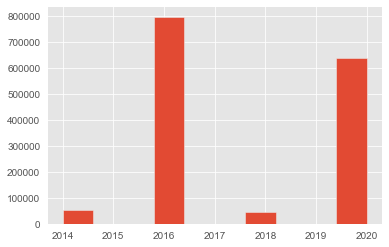

In [87]:
data_frame
display(data_frame.head())
# Imprimindo as últimas linhas
display(data_frame.tail())
# Informações do nosso DataFrame
data_frame.describe()
# Dimensões do df_dados
data_frame.shape
plt.hist(x = data_frame['ANO_ELEICAO'] )


In [50]:
# Imprimindo as colunas município e uf'
df_municipio_uf = data_frame[['ANO_ELEICAO', 'DS_ELEICAO' , 'SG_UF', 'NM_UE', 'TP_ABRANGENCIA', 'DS_CARGO' , 'NM_TIPO_ELEICAO', 'NR_PARTIDO' , 'SG_PARTIDO']]
df_municipio_uf

,ANO_ELEICAO,DS_ELEICAO,SG_UF,NM_UE,TP_ABRANGENCIA,DS_CARGO,NM_TIPO_ELEICAO,NR_PARTIDO,SG_PARTIDO
0,2014,Eleições Gerais 2014,AC,ACRE,FEDERAL,DEPUTADO ESTADUAL,ELEIÇÃO ORDINÁRIA,54,PPL
1,2014,Eleições Gerais 2014,AC,ACRE,FEDERAL,DEPUTADO ESTADUAL,ELEIÇÃO ORDINÁRIA,40,PSB
2,2014,Eleições Gerais 2014,AC,ACRE,FEDERAL,DEPUTADO ESTADUAL,ELEIÇÃO ORDINÁRIA,11,PP
3,2014,Eleições Gerais 2014,AC,ACRE,FEDERAL,DEPUTADO ESTADUAL,ELEIÇÃO ORDINÁRIA,43,PV
4,2014,Eleições Gerais 2014,AC,ACRE,FEDERAL,DEPUTADO ESTADUAL,ELEIÇÃO ORDINÁRIA,43,PV
...,...,...,...,...,...,...,...,...,...
6119,2020,Eleições Municipais 2020,TO,PEIXE,MUNICIPAL,VEREADOR,ELEIÇÃO ORDINÁRIA,25,DEM
6130,2020,Eleições Municipais 2020,TO,ARAGUANÃ,MUNICIPAL,VEREADOR,ELEIÇÃO ORDINÁRIA,23,CIDADANIA
6306,2020,Eleições Municipais 2020,TO,MAURILÂNDIA DO TOCANTINS,MUNICIPAL,VEREADOR,ELEIÇÃO ORDINÁRIA,15,MDB
6307,2020,Eleições Municipais 2020,TO,ALIANÇA DO TOCANTINS,MUNICIPAL,VEREADOR,ELEIÇÃO ORDINÁRIA,14,PTB


<AxesSubplot:>

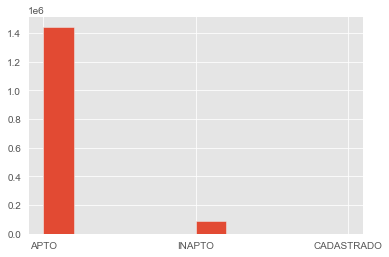

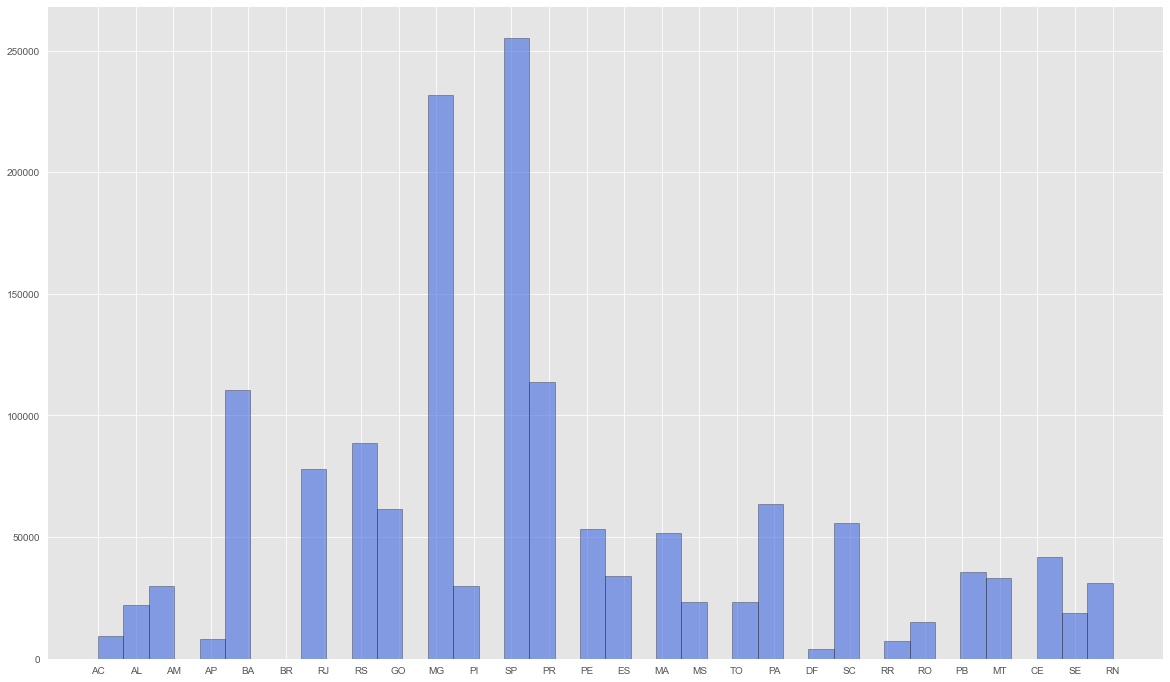

In [88]:
plt.hist(x = data_frame['DS_SITUACAO_CANDIDATURA'] )
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
data_frame['SG_UF'].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")


<b>2) Dados Cassacao</b>

In [66]:
print('Arquivos com extensão csv:')
concatenar = []
with os.scandir(dirCandidatoCassacaoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)

  
    path = dirCandidatoCassacaoAnalise
  
    # csv files in the path
    files = glob.glob(path + "/*.csv")

    # defining an empty list to store 
    # content
    data_frame_cassacao = pd.DataFrame()
    content_situacao = []

    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfs = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False)
        content_situacao.append(dfs)
    # converting content to data frame
    data_frame_cassacao = pd.concat(content_situacao).drop_duplicates()


Arquivos com extensão csv:
motivo_cassacao_2014_AC.csv
motivo_cassacao_2014_AL.csv
motivo_cassacao_2014_AM.csv
motivo_cassacao_2014_AP.csv
motivo_cassacao_2014_BA.csv
motivo_cassacao_2014_BR.csv
motivo_cassacao_2014_BRASIL.csv
motivo_cassacao_2014_CE.csv
motivo_cassacao_2014_DF.csv
motivo_cassacao_2014_ES.csv
motivo_cassacao_2014_GO.csv
motivo_cassacao_2014_MA.csv
motivo_cassacao_2014_MG.csv
motivo_cassacao_2014_MS.csv
motivo_cassacao_2014_MT.csv
motivo_cassacao_2014_PA.csv
motivo_cassacao_2014_PB.csv
motivo_cassacao_2014_PE.csv
motivo_cassacao_2014_PI.csv
motivo_cassacao_2014_PR.csv
motivo_cassacao_2014_RJ.csv
motivo_cassacao_2014_RN.csv
motivo_cassacao_2014_RO.csv
motivo_cassacao_2014_RR.csv
motivo_cassacao_2014_RS.csv
motivo_cassacao_2014_SC.csv
motivo_cassacao_2014_SE.csv
motivo_cassacao_2014_SP.csv
motivo_cassacao_2014_TO.csv
motivo_cassacao_2016_AC.csv
motivo_cassacao_2016_AL.csv
motivo_cassacao_2016_AM.csv
motivo_cassacao_2016_AP.csv
motivo_cassacao_2016_BA.csv
motivo_cassacao_2

In [84]:
display(data_frame_cassacao.head())
# Imprimindo as últimas linhas
display(data_frame_cassacao.tail())
# Informações do nosso DataFrame
data_frame_cassacao.describe()
# Dimensões do df_dados
data_frame_cassacao.shape

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
0,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,40000012065,Ausência de requisito de registro
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,40000012072,Ficha limpa (LC 64/90)
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,270000010439,Ausência de requisito de registro
2,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,270000010440,Ausência de requisito de registro
3,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,270000010445,Ausência de requisito de registro


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
18092,18/02/2022,11:23:41,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,67938,OSVALDO CRUZ,250001208385,Ficha limpa (LC 64/90)
18093,18/02/2022,11:23:41,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,MT,98930,SORRISO,110001210849,Ausência de requisito de registro
18094,18/02/2022,11:23:41,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,RO,434,NOVA MAMORÉ,220000642590,Ficha limpa (LC 64/90)
18095,18/02/2022,11:23:41,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,MG,44350,DIONÍSIO,130000671090,Ausência de requisito de registro
18097,18/02/2022,11:23:41,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,PA,5355,SANTARÉM,140001243479,Ausência de requisito de registro


(39876, 12)

In [ ]:
data_frame
data_frame_cassacao